In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sortedcontainers import SortedList
from datetime import datetime

%matplotlib inline 
plt.style.use("ggplot")

In [5]:
from util import get_data

In [19]:
class KNN(object): 
    # k = num_neighbors 
    def __init__(self, k):
        self.k = k
        
    # X = train data input 
    # y = train data label 
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X):
        y = np.zeros(len(X))                 # # of rows, i.e., N=# of samples in given test data X
        for i,x in enumerate(X):             # to each test data 
            sl = SortedList()                # stores (distance,class) tuples 
            for j,xt in enumerate(self.X):   # for each training data 
                
                # distance between 2 images : sum( (x[i] - xt[i]) ** 2
                diff = x - xt
                d = diff.dot(diff)
                
                if len(sl) < self.k: 
                    # add to the list blindy 
                    sl.add( (d, self.y[j] ))
                else:
                    if d < sl[-1][0]:        # distance smaller than the previous largest 
                        del sl[-1]
                        sl.add( (d, self.y[j]))
            
            # vote for the current test point 
            votes = {}  # empty dictionary 
            for _, v in sl:
                # when class(v) is not in map, return 0. 
                votes[v] = votes.get(v,0) + 1 
            
            # find max votes 
            max_votes = 0
            max_votes_class = -1
            for v,count in votes.items():
                # class(v), count
                if count > max_votes:
                    max_votes = count
                    max_votes_class = v
            y[i] = max_votes_class
        
        return y
    
    def score(self, X, y): 
        yhat = self.predict(X)
        return np.mean( yhat == y ) 
            

Reading in and transforming data...

k =  1
Training time: 0:00:00
Train accuracy: 1.0
Time to compute train accuracy: 0:00:09.671000 Train Size: 1000
Test accuracy: 0.868
Time to compute test accuracy: 0:00:13.805000 Test Size: 1000

k =  2
Training time: 0:00:00
Train accuracy: 1.0
Time to compute train accuracy: 0:00:09.695000 Train Size: 1000
Test accuracy: 0.868
Time to compute test accuracy: 0:00:13.937000 Test Size: 1000

k =  3
Training time: 0:00:00
Train accuracy: 0.953
Time to compute train accuracy: 0:00:09.833000 Train Size: 1000
Test accuracy: 0.873
Time to compute test accuracy: 0:00:14.253000 Test Size: 1000

k =  4
Training time: 0:00:00
Train accuracy: 0.951
Time to compute train accuracy: 0:00:09.742000 Train Size: 1000
Test accuracy: 0.877
Time to compute test accuracy: 0:00:13.999000 Test Size: 1000

k =  5
Training time: 0:00:00
Train accuracy: 0.936
Time to compute train accuracy: 0:00:09.967000 Train Size: 1000
Test accuracy: 0.879
Time to compute test accuracy:

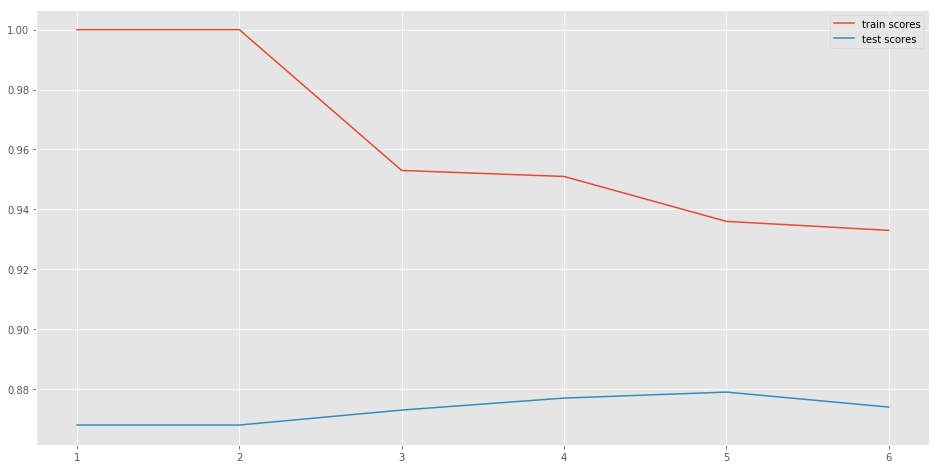

In [18]:
def run_test():
    X, Y = get_data(2000)  # 2000 samples 
    Ntrain = 1000          # 1000 training data, 1000 test data 
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest,  Ytest  = X[Ntrain:], Y[Ntrain:]
    train_scores = [] 
    test_scores = []
    
    # try different Ks 
    ks = [1,2,3,4,5,6]
    for k in ks:
        print("\nk = ", k)
        knn = KNN(k)
        
        # train does nothing actually 
        t0 = datetime.now()
        knn.fit(Xtrain, Ytrain)
        print("Training time:", (datetime.now()-t0))
        
        # Score to train data (with k=1, 1.0)
        t0 = datetime.now() 
        train_score = knn.score( Xtrain, Ytrain ) 
        train_scores.append(train_score) 
        print("Train accuracy:", train_score)
        print("Time to compute train accuracy:", (datetime.now() - t0), "Train Size:", len(Ytrain))
        
        # Score to test data
        t0 = datetime.now() 
        test_score = knn.score( Xtest, Ytest ) 
        test_scores.append(test_score) 
        print("Test accuracy:", test_score)
        print("Time to compute test accuracy:", (datetime.now() - t0), "Test Size:", len(Ytest))
        
    plt.figure(figsize=(16,8))
    plt.plot(ks, train_scores, label="train scores") 
    plt.plot(ks, test_scores,  label="test scores") 
    plt.legend()
    
# run test 
run_test()